<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT03648840.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 17)

In [2]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT03648840.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,cohort reference event-condition documentation date-time,no_latex_allergy-health factor,chf-condition documentation date-time-days from reference,ckd-condition documentation date-time-days from reference,pregnant-health factor,antithrombotics-medication (administered),...,breath_alcohol-lab test,breath_alcohol-result numeric (original),suicidal -health factor,methamphetamines-lab test,methamphetamines-result numeric (original),english_speaking-health factor,bmi-condition,right-handed-health factor
0,1953.666667,Male,1999.166667,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,True,False
1,1950.166667,Male,1999.333333,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,True,False
2,1949.416667,Male,2003.583333,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,True,False
3,1954.750000,Male,1999.250000,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,True,False
4,1961.166667,censored,2002.083333,censored,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1952.583333,Male,2000.250000,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,False,False
186,1952.833333,Male,2002.333333,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,False,False
187,1957.416667,Female,2000.166667,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,False,False
188,1958.666667,Male,2000.250000,False,False,False,False,False,...,NaN,NaN,True,NaN,NaN,True,False,False


In [3]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   date of birth                                              190 non-null    float64
 1   gender at birth                                            190 non-null    object 
 2   cohort reference event-condition documentation date-time   190 non-null    float64
 3   no_latex_allergy-health factor                             190 non-null    object 
 4   chf-condition documentation date-time-days from reference  190 non-null    bool   
 5   ckd-condition documentation date-time-days from reference  190 non-null    bool   
 6   pregnant-health factor                                     190 non-null    bool   
 7   antithrombotics-medication (administered)                  190 non-null    bool   
 8   amphetamin

In [4]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                                                  0.000000
gender at birth                                                0.000000
cohort reference event-condition documentation date-time       0.000000
no_latex_allergy-health factor                                 0.000000
chf-condition documentation date-time-days from reference      0.000000
ckd-condition documentation date-time-days from reference      0.000000
pregnant-health factor                                         0.000000
antithrombotics-medication (administered)                      0.000000
amphetamines-lab test                                          0.000000
amphetamines-result numeric (original)                         0.000000
barbiturates-lab test                                          0.000000
barbiturates-result numeric (original)                         0.000000
benzodiazepines-lab test                                       0.000000
benzodiazepines-result numeric (original)                      0

In [5]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,cohort reference event-condition documentation date-time,no_latex_allergy-health factor,chf-condition documentation date-time-days from reference,ckd-condition documentation date-time-days from reference,pregnant-health factor,antithrombotics-medication (administered),...,breath_alcohol-result numeric (original),suicidal -health factor,methamphetamines-lab test,methamphetamines-result numeric (original),english_speaking-health factor,bmi-condition,right-handed-health factor,age
0,1961,censored,2002.083333,censored,False,False,False,False,...,NaN,True,NaN,NaN,True,True,False,62
1,1959,censored,1999.250000,censored,False,False,False,False,...,NaN,True,NaN,NaN,True,True,False,64
2,1961,censored,2009.833333,censored,False,False,False,False,...,NaN,True,censored,NaN,censored,True,False,62
3,1961,Male,2000.000000,False,False,False,False,False,...,NaN,True,NaN,NaN,False,True,False,62
4,1959,Male,1999.750000,False,False,False,False,False,...,NaN,True,NaN,NaN,True,True,False,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1961,Male,2001.666667,False,False,False,False,False,...,NaN,True,NaN,NaN,True,False,False,62
82,1959,Male,2001.583333,False,False,False,False,False,...,NaN,True,NaN,NaN,True,False,False,64
83,1959,Male,2001.250000,False,False,False,False,False,...,NaN,True,NaN,NaN,False,False,False,64
84,1977,Male,2001.833333,False,False,False,False,False,...,NaN,True,NaN,NaN,False,False,False,46


In [6]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
no_latex_allergy-health factor                                 0.000000
chf-condition documentation date-time-days from reference      0.000000
ckd-condition documentation date-time-days from reference      0.000000
pregnant-health factor                                         0.000000
antithrombotics-medication (administered)                      0.000000
amphetamines-lab test                                          0.000000
barbiturates-lab test                                          0.000000
benzodiazepines-lab test                                       0.000000
cocaine-lab test                                               0.000000
opiates-lab test                                               0.000000
phencyclidine-lab test                                         0.000000
breath_alcohol-lab test                                        0.000000
suicidal -health factor     

In [7]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

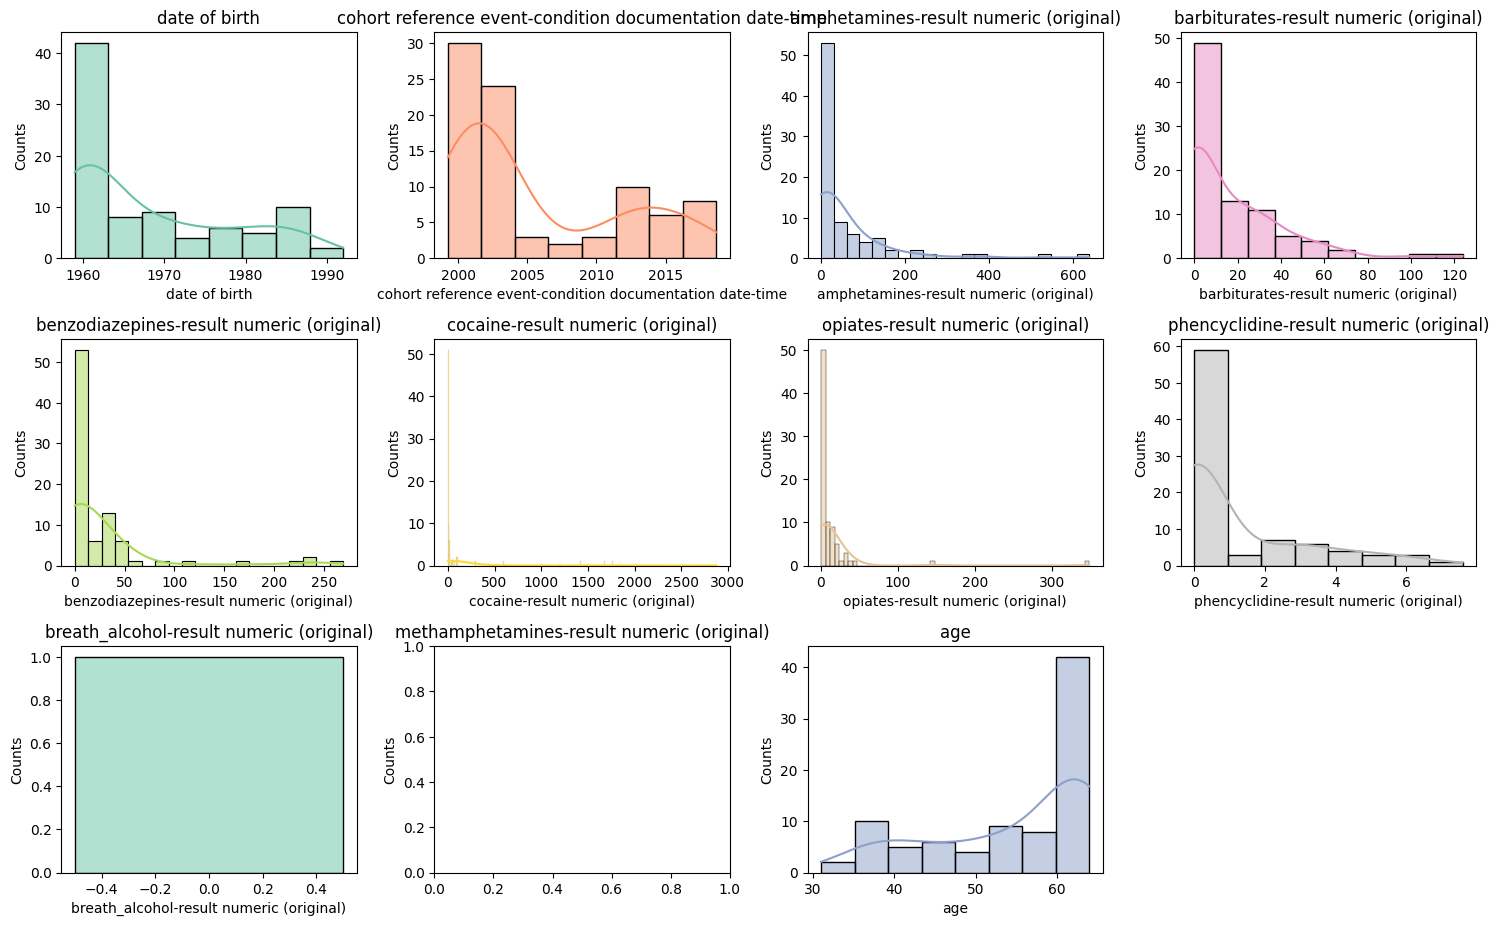

-1

In [10]:
numeric_cols = cohort.select_dtypes(include=['number']).columns 
plot_util(cohort,numeric_cols,'hist',figsize=(15,12))

In [11]:
# Calculate descriptive statistics
cols_to_plot = numeric_cols
stats = cohort[cols_to_plot].describe()
stats

,date of birth,cohort reference event-condition documentation date-time,amphetamines-result numeric (original),barbiturates-result numeric (original),benzodiazepines-result numeric (original),cocaine-result numeric (original),opiates-result numeric (original),phencyclidine-result numeric (original),breath_alcohol-result numeric (original),methamphetamines-result numeric (original),age
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,82.000000,86.000000,1.0,0.0,86.000000
mean,1968.372093,2005.695736,60.572018,16.936078,26.376518,150.656878,12.844369,1.231135,0.0,NaN,54.627907
std,9.980035,6.209809,112.543162,24.003620,55.492051,481.590143,41.854056,1.931632,NaN,NaN,9.980035
min,1959.000000,1999.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,31.000000
25%,1960.000000,2000.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,46.000000
50%,1964.000000,2002.791667,18.572342,3.630424,0.000000,4.048175,0.000000,0.000000,0.0,NaN,59.000000
75%,1977.000000,2012.166667,69.447794,27.883679,30.962942,16.353289,12.967519,2.199150,0.0,NaN,63.000000
max,1992.000000,2018.666667,639.725205,123.738806,269.311369,2875.316214,348.377626,7.590863,0.0,NaN,64.000000


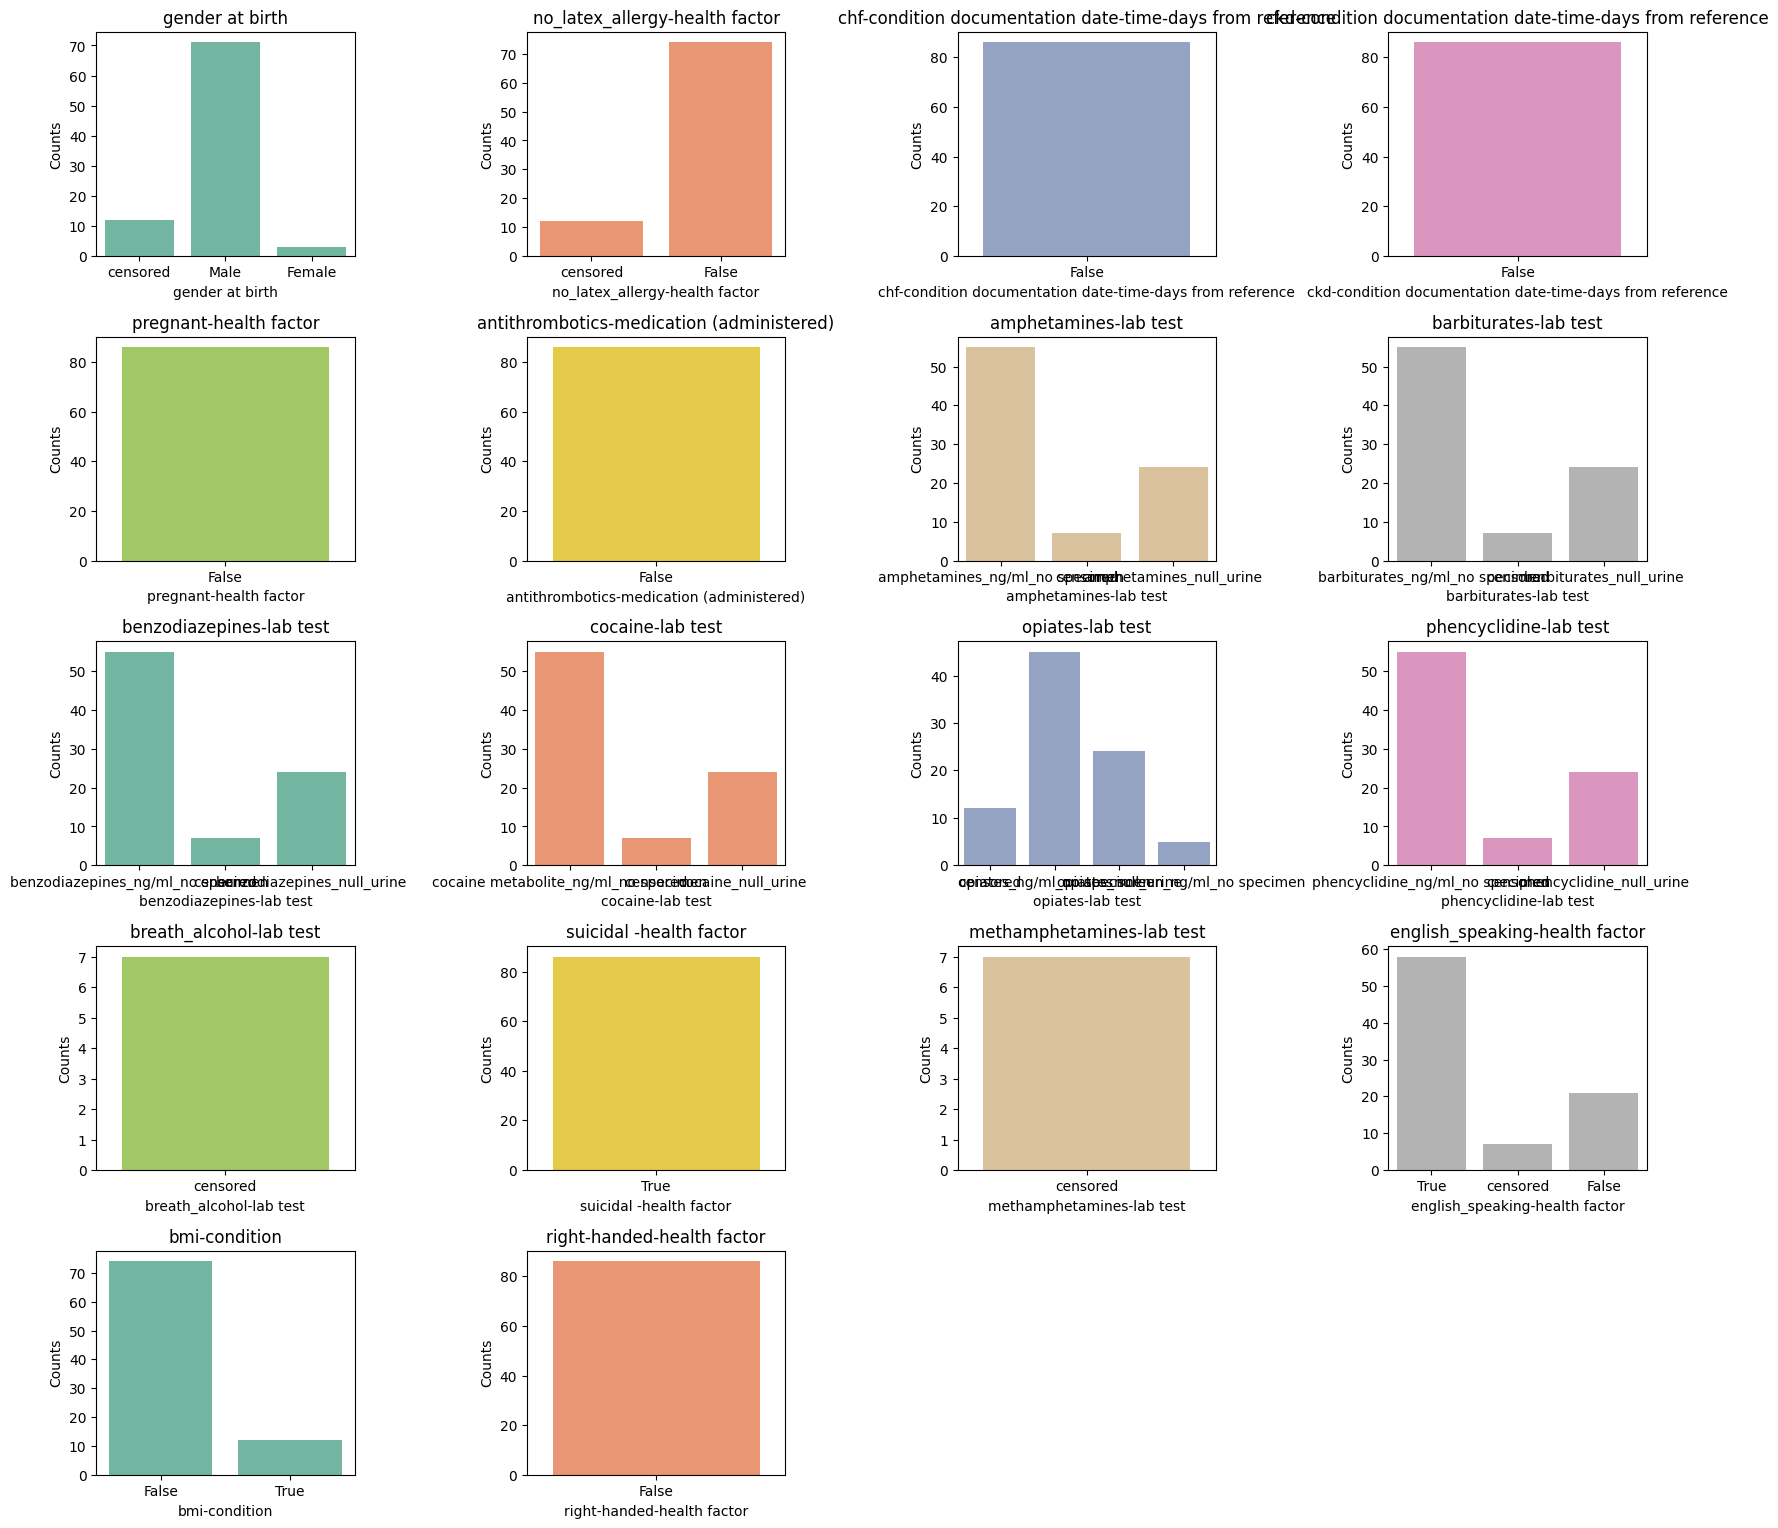

-1

In [13]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(17,18))

In [14]:
cohort.select_dtypes(exclude=['number']).columns

Index(['gender at birth', 'no_latex_allergy-health factor',
       'chf-condition documentation date-time-days from reference',
       'ckd-condition documentation date-time-days from reference',
       'pregnant-health factor', 'antithrombotics-medication (administered)',
       'amphetamines-lab test', 'barbiturates-lab test',
       'benzodiazepines-lab test', 'cocaine-lab test', 'opiates-lab test',
       'phencyclidine-lab test', 'breath_alcohol-lab test',
       'suicidal -health factor', 'methamphetamines-lab test',
       'english_speaking-health factor', 'bmi-condition',
       'right-handed-health factor'],
      dtype='object')

In [19]:
for attribute in nonnumeric_columns:
  print(cohort[attribute].value_counts())

Male        71
censored    12
Female       3
Name: gender at birth, dtype: int64
False       74
censored    12
Name: no_latex_allergy-health factor, dtype: int64
False    86
Name: chf-condition documentation date-time-days from reference, dtype: int64
False    86
Name: ckd-condition documentation date-time-days from reference, dtype: int64
False    86
Name: pregnant-health factor, dtype: int64
False    86
Name: antithrombotics-medication (administered), dtype: int64
amphetamines_ng/ml_no specimen    55
amphetamines_null_urine           24
censored                           7
Name: amphetamines-lab test, dtype: int64
barbiturates_ng/ml_no specimen    55
barbiturates_null_urine           24
censored                           7
Name: barbiturates-lab test, dtype: int64
benzodiazepines_ng/ml_no specimen    55
benzodiazepines_null_urine           24
censored                              7
Name: benzodiazepines-lab test, dtype: int64
cocaine metabolite_ng/ml_no specimen    55
cocaine_null_ur

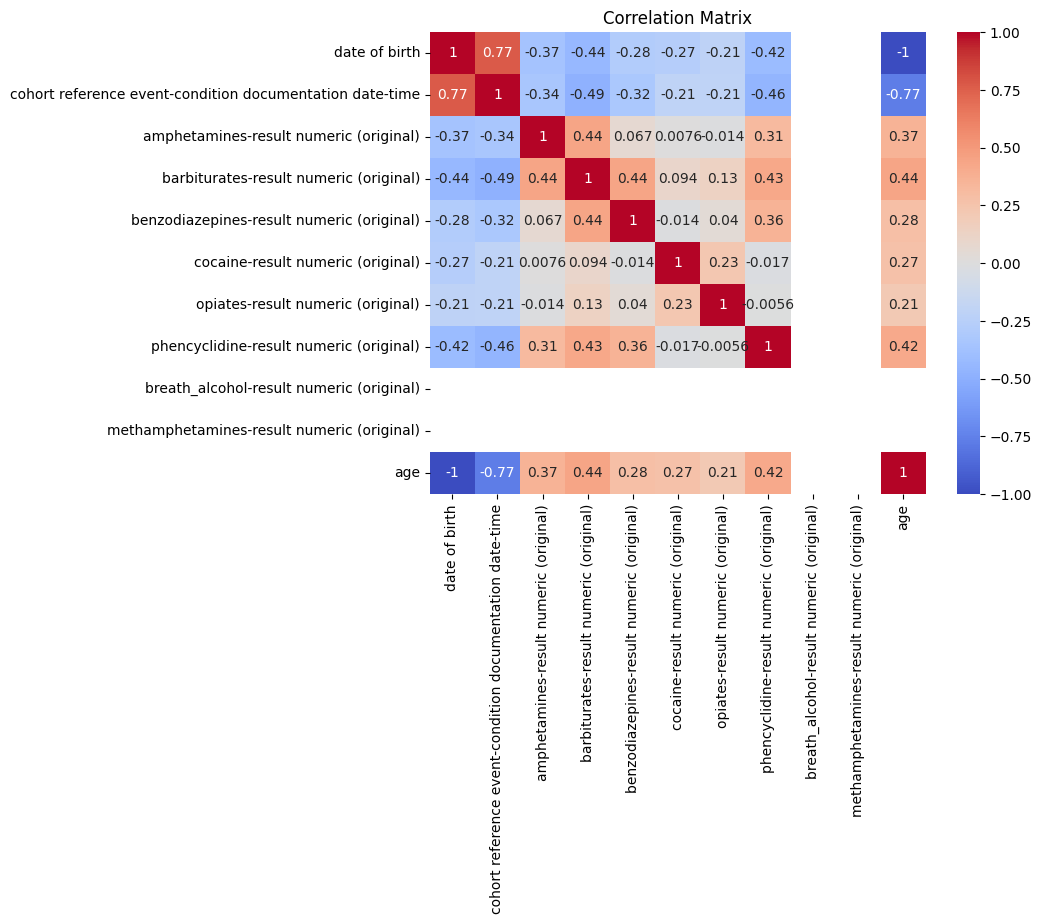

In [15]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()